In [135]:
base_path = './dataset/'
# Caminho para as pastas de datasets
path_outras = f'{base_path}outras_unidades/Prata_II.csv'

In [136]:
import pandas as pd

def update_date_column(file_path):
    # Carregar o DataFrame a partir do arquivo CSV
    df = pd.read_csv(file_path)

    # Gerar uma sequência de datas de 15 em 15 minutos
    start_date = pd.to_datetime('01/01/2022 00:15', format='%d/%m/%Y %H:%M')
    end_date = pd.to_datetime('01/01/2023 00:00', format='%d/%m/%Y %H:%M')
    
    # Criar um intervalo de datas com passos de 15 minutos
    date_range = pd.date_range(start=start_date, end=end_date, freq='15T')
    
    # Verificar se o DataFrame tem o mesmo número de linhas que o número de datas geradas
    if len(df) != len(date_range):
        print(f"Atenção: O DataFrame tem {len(df)} linhas, enquanto a série de datas tem {len(date_range)}.")
        return df  # Retorna o DataFrame original sem modificações
    
    # Substituir a coluna 'Data' pelo novo intervalo de datas
    df['Data'] = date_range.strftime('%d/%m/%Y %H:%M')
    
    return df



In [137]:
Prata_II = update_date_column(path_outras)

C:\Users\Renan Torres\AppData\Local\Temp\ipykernel_4252\1925355047.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='15T')


In [138]:
def aggregate_to_hourly(df):
    # Converter a coluna 'Data' para datetime, se ainda não for
    df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y %H:%M')

    # Definir a coluna 'Data' como índice
    df.set_index('Data', inplace=True)

    # Agrupar os dados a cada hora e somar os valores de 'kWh fornecido'
    hourly_df = df.resample('H').sum()

    return hourly_df



In [139]:
Prata_II = aggregate_to_hourly(Prata_II)

C:\Users\Renan Torres\AppData\Local\Temp\ipykernel_4252\2381754476.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = df.resample('H').sum()


In [140]:
# Salvar os resultados em um arquivo CSV ou JSON
results_df = pd.DataFrame(Prata_II)
results_df.to_csv('PRATA_II.csv', index=True)

In [141]:
import matplotlib.pyplot as plt

def plot_hourly_data(hourly_df):
    # Plotar os dados horários
    plt.figure(figsize=(12, 6))
    plt.plot(hourly_df.index, hourly_df['kWh fornecido'], marker='o', linestyle='-')
    plt.title('Consumo Horário de Energia (kWh)')
    plt.xlabel('Data e Hora')
    plt.ylabel('kWh fornecido')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()  # Ajusta o layout para evitar sobreposições
    plt.show()



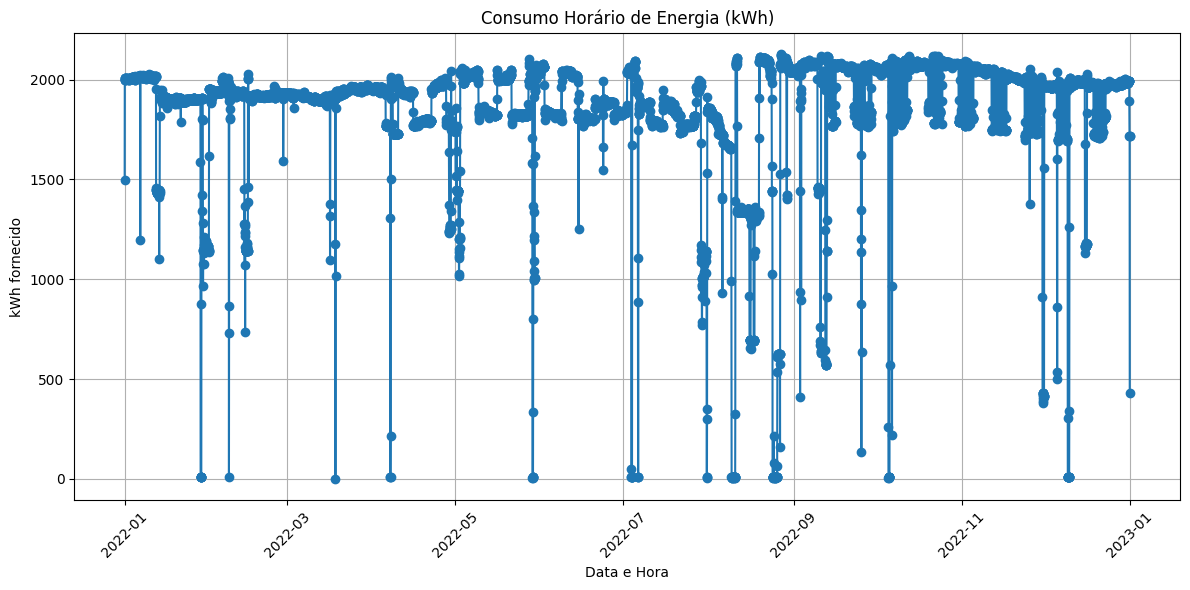

In [143]:
plot_hourly_data(Prata_II)